#📌 Extracción

In [165]:
import pandas as pd


In [166]:
url= 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
datos= pd.read_json(url)


In [167]:
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

In [168]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [169]:
datos.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


###**Normalizar columnas**

In [170]:
df=datos.copy()

In [171]:
customer_normalizado= pd.json_normalize(df['customer'])
df['customer'] = None
df = df.drop(columns='customer')  # Eliminamos la columna anidada original
df = pd.concat([df, customer_normalizado], axis=1)
phone_normalizado= pd.json_normalize(df['phone'])
df['phone'] = None
df = df.drop(columns='phone')
df = pd.concat([df, phone_normalizado], axis=1)
internet_normalizado= pd.json_normalize(df['internet'])
df['internet'] = None
df = df.drop(columns='internet')
df = pd.concat([df, internet_normalizado], axis=1)
account_normalizado= pd.json_normalize(df['account'])
df['account'] = None
df = df.drop(columns='account')
df = pd.concat([df, account_normalizado], axis=1)


In [172]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [174]:
#evaluar valores nulos

In [175]:
df.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [176]:
#evaluar valores nulos

In [177]:
df.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [178]:
df[df['Charges.Total'] == 0]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [179]:
#evaluar valores duplicados

In [180]:
df.duplicated().sum()

np.int64(0)

In [181]:
list=df.columns
list

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [182]:
for i in df.columns:
    num_dup = df[i].duplicated().sum()
    print(f"{i}: {num_dup} duplicados")

customerID: 0 duplicados
Churn: 7264 duplicados
gender: 7265 duplicados
SeniorCitizen: 7265 duplicados
Partner: 7265 duplicados
Dependents: 7265 duplicados
tenure: 7194 duplicados
PhoneService: 7265 duplicados
MultipleLines: 7264 duplicados
InternetService: 7264 duplicados
OnlineSecurity: 7264 duplicados
OnlineBackup: 7264 duplicados
DeviceProtection: 7264 duplicados
TechSupport: 7264 duplicados
StreamingTV: 7264 duplicados
StreamingMovies: 7264 duplicados
Contract: 7264 duplicados
PaperlessBilling: 7265 duplicados
PaymentMethod: 7263 duplicados
Charges.Monthly: 5682 duplicados
Charges.Total: 736 duplicados


In [183]:
print(df['Churn'].unique())
print(df['Churn'].value_counts(dropna=False))


#unicos = df['Churn'].value_counts()
#valores_unicos = unicos[unicos == 1].index
#df_unicos = df[df['Churn'].isin(valores_unicos)]
#print(df_unicos)

df_vacios_churn = df[df['Churn'] == '']
print(df_vacios_churn)
print(df[df['Churn'] == '']['customerID'])


# df_vacios_churn.head(224)

['No' 'Yes' '']
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
      customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
30    0047-ZHDTW        Female              0      No         No      11   
75    0120-YZLQA          Male              0      No         No      71   
96    0154-QYHJU          Male              0      No         No      29   
98    0162-RZGMZ        Female              1      No         No       5   
175   0274-VVQOQ          Male              1     Yes         No      65   
...          ...   ...     ...            ...     ...        ...     ...   
7158  9840-GSRFX        Female              0      No         No      14   
7180  9872-RZQQB        Female              0     Yes         No      49   
7211  9920-GNDMB          Male              0      No         No       9   
7239  9955-RVWSC        Female              0     Yes        Yes      67   
7247  9966-VYRTZ        Female              0     Yes        Yes      31   

   

###**Borrando campos vacíos**

In [184]:
import numpy as np

# Reemplazar '' y 'NaN' por np.nan (NaN real)
df['Churn'] = df['Churn'].replace(['', 'NaN', 'nan', 'None'], np.nan)

In [185]:
df = df.dropna(subset=['Churn'])

In [186]:
print(df['Churn'].unique())
print(df['Churn'].value_counts(dropna=False))

['No' 'Yes']
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [187]:
resumen = pd.DataFrame({
    'No nulos': df.notna().sum(),
    'Nulos': df.isna().sum(),
    'Total': len(df)
})
print(resumen)

                  No nulos  Nulos  Total
customerID            7043      0   7043
Churn                 7043      0   7043
gender                7043      0   7043
SeniorCitizen         7043      0   7043
Partner               7043      0   7043
Dependents            7043      0   7043
tenure                7043      0   7043
PhoneService          7043      0   7043
MultipleLines         7043      0   7043
InternetService       7043      0   7043
OnlineSecurity        7043      0   7043
OnlineBackup          7043      0   7043
DeviceProtection      7043      0   7043
TechSupport           7043      0   7043
StreamingTV           7043      0   7043
StreamingMovies       7043      0   7043
Contract              7043      0   7043
PaperlessBilling      7043      0   7043
PaymentMethod         7043      0   7043
Charges.Monthly       7043      0   7043
Charges.Total         7043      0   7043


In [188]:
import numpy as np

# Reemplazar strings vacíos, espacios y palabras como 'NaN' por np.nan
df.replace(['', ' ', 'NaN', 'nan', 'NULL', 'None'], np.nan, inplace=True)

# Ahora revisa de nuevo cuántos nulos hay
resumen = pd.DataFrame({
    'No nulos': df.notna().sum(),
    'Nulos': df.isna().sum(),
    'Total': len(df)
})
print(resumen)

                  No nulos  Nulos  Total
customerID            7043      0   7043
Churn                 7043      0   7043
gender                7043      0   7043
SeniorCitizen         7043      0   7043
Partner               7043      0   7043
Dependents            7043      0   7043
tenure                7043      0   7043
PhoneService          7043      0   7043
MultipleLines         7043      0   7043
InternetService       7043      0   7043
OnlineSecurity        7043      0   7043
OnlineBackup          7043      0   7043
DeviceProtection      7043      0   7043
TechSupport           7043      0   7043
StreamingTV           7043      0   7043
StreamingMovies       7043      0   7043
Contract              7043      0   7043
PaperlessBilling      7043      0   7043
PaymentMethod         7043      0   7043
Charges.Monthly       7043      0   7043
Charges.Total         7032     11   7043


<ipython-input-188-2254757066>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [190]:
#Convertir Charges.Total a float

In [191]:
# Limpiar espacios en los nombres
df.columns = df.columns.str.strip()

# Convertir a float64, forzando errores a NaN
df.loc[:, 'Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# Reemplazar NaN por 0 (opcional)
df.loc[:, 'Charges.Total'] = df['Charges.Total'].fillna(0)

# Verificar tipo
print(df['Charges.Total'].dtype)

object


<ipython-input-191-3481937462>:8: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [193]:
resumen = pd.DataFrame({
    'No nulos': df.notna().sum(),
    'Nulos': df.isna().sum(),
    'Total': len(df)
})
print(resumen)

                  No nulos  Nulos  Total
customerID            7043      0   7043
Churn                 7043      0   7043
gender                7043      0   7043
SeniorCitizen         7043      0   7043
Partner               7043      0   7043
Dependents            7043      0   7043
tenure                7043      0   7043
PhoneService          7043      0   7043
MultipleLines         7043      0   7043
InternetService       7043      0   7043
OnlineSecurity        7043      0   7043
OnlineBackup          7043      0   7043
DeviceProtection      7043      0   7043
TechSupport           7043      0   7043
StreamingTV           7043      0   7043
StreamingMovies       7043      0   7043
Contract              7043      0   7043
PaperlessBilling      7043      0   7043
PaymentMethod         7043      0   7043
Charges.Monthly       7043      0   7043
Charges.Total         7043      0   7043


###**Crear columna cuentas diarias**

In [194]:
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30

# Mostrar las primeras filas para verificar
print(df[['Charges.Monthly', 'Cuentas_Diarias']].head())

   Charges.Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667


<ipython-input-194-2067641251>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [195]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


#📊 Carga y análisis

In [196]:
df.describe()

,SeniorCitizen,tenure,Charges.Monthly,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2.158723
std,0.368612,24.559481,30.090047,1.003002
min,0.000000,0.000000,18.250000,0.608333
25%,0.000000,9.000000,35.500000,1.183333
50%,0.000000,29.000000,70.350000,2.345000
75%,0.000000,55.000000,89.850000,2.995000
max,1.000000,72.000000,118.750000,3.958333


In [197]:
#Clientes que se fueron y mantuvieron

In [198]:
import plotly.express as px

# Contar la cantidad por cada categoría de Churn
churn_counts = df['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

fig = px.pie(churn_counts, values='Count', names='Churn',
             title='Proporción de Clientes según se dieron de baja',
             color='Churn',
             color_discrete_map={'No': 'green', 'Yes': 'red'},
             labels={'Churn': 'Se dieron de baja', 'Count': 'Número de Clientes'})

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

In [199]:
# Contar la cantidad por cada categoría de Churn
churn_counts = df['Churn'].value_counts(normalize=True).reset_index()
churn_counts.columns = ['Churn', 'Proportion']
churn_counts['Proportion'] = churn_counts['Proportion'] * 100  # pasar a porcentaje

fig = px.bar(churn_counts, x='Churn', y='Proportion', text=churn_counts['Proportion'].round(2),
             title='Proporción de Clientes según se dieron de baja',
             labels={'Churn': 'Se dieron de baja', 'Proportion': 'Porcentaje de Clientes (%)'},
             color='Churn',
             color_discrete_map={'No': 'green', 'Yes': 'red'})

fig.update_traces(textposition='outside')
fig.update_layout(yaxis_range=[0,100])

fig.show()

###**evasión POR GÉNERO**

In [200]:
import plotly.express as px

fig = px.histogram(df, x='gender', color='Churn', barmode='group',
                   title='Distribución de evasión según Género',
                   labels={'gender': 'Género', 'count': 'Número de Clientes'},
                   color_discrete_map={'No': 'green', 'Yes': 'red'})

fig.show()

###**evasión por tipo de contrato**

In [201]:
fig = px.histogram(df, x='Contract', color='Churn', barmode='group',
                   title='Distribución de evasión según Tipo de Contrato',
                   labels={'Contract': 'Tipo de Contrato', 'count': 'Número de Clientes'},
                   color_discrete_map={'No': 'green', 'Yes': 'red'})

fig.show()

###**evasión por método de pago**

In [202]:
fig = px.histogram(df, x='PaymentMethod', color='Churn', barmode='group',
                   title='Distribución de evasión según Método de Pago',
                   labels={'PaymentMethod': 'Método de Pago', 'count': 'Número de Clientes'},
                   color_discrete_map={'No': 'green', 'Yes': 'red'})

fig.update_layout(xaxis_tickangle=-45)
fig.show()

###**% de clientes que hicieron evasión según el tipo de contrato**

In [203]:
import pandas as pd
import plotly.express as px

# Agrupamos y calculamos porcentaje de churn dentro de cada categoría
df_group = df.groupby(['Contract', 'Churn']).size().reset_index(name='count')
df_total = df_group.groupby('Contract')['count'].transform('sum')
df_group['percentage'] = round(df_group['count'] / df_total * 100, 2)

# Filtrar solo los clientes que se dieron de baja (Churn = Yes)
df_churn_yes = df_group[df_group['Churn'] == 'Yes']

# Gráfico
fig = px.bar(df_churn_yes, x='Contract', y='percentage', text='percentage',
             title='% de Clientes que hicieron evasión según Tipo de Contrato',
             labels={'percentage': 'Porcentaje (%)', 'Contract': 'Tipo de Contrato'},
             color='Contract')

fig.update_traces(textposition='outside')
fig.update_layout(showlegend=False, yaxis_range=[0, 100])
fig.show()

In [204]:
categorical_vars = ['gender', 'Contract', 'PaymentMethod', 'InternetService']

for var in categorical_vars:
    df_group = df.groupby([var, 'Churn']).size().reset_index(name='count')
    df_total = df_group.groupby(var)['count'].transform('sum')
    df_group['percentage'] = round(df_group['count'] / df_total * 100, 2)

    df_churn_yes = df_group[df_group['Churn'] == 'Yes']

    fig = px.bar(df_churn_yes, x=var, y='percentage', text='percentage',
                 title=f'% de Clientes que hicieron evasión según {var}',
                 labels={var: var, 'percentage': 'Porcentaje (%)'},
                 color=var)

    fig.update_traces(textposition='outside')
    fig.update_layout(showlegend=False, yaxis_range=[0, 100], xaxis_tickangle=-30)
    fig.show()

###**Conteo de evasión por variables numéricas**

In [205]:
#Distribución de Total Gastado (Charges.Total) según Churn


In [206]:
fig = px.histogram(df, x='Charges.Total', color='Churn',
                   nbins=50,
                   title='Distribución de Total Gastado según Estado de evasión',
                   labels={'Charges.Total': 'Total Gastado', 'count': 'Número de Clientes'},
                   color_discrete_map={'No': 'green', 'Yes': 'red'})

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.6)
fig.show()

In [207]:
#Comparación de Meses de Contraro según evasión

In [208]:
fig = px.box(df, x='Churn', y='tenure', color='Churn',
             title='Tiempo de Contrato (Tenure) según Estado de evasión',
             labels={'tenure': 'Meses de Contrato'},
             color_discrete_map={'No': 'green', 'Yes': 'red'})

fig.show()

In [209]:
fig = px.histogram(df, x='tenure', color='Churn',
                   nbins=50,
                   title='Distribución del Tiempo de Contrato según evasión',
                   labels={'tenure': 'Meses de Contrato'},
                   color_discrete_map={'No': 'green', 'Yes': 'red'})

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.6)
fig.show()

In [210]:
#Comparación de Charges.Monthly por evasión

In [211]:
fig = px.box(df, x='Churn', y='Charges.Monthly', color='Churn',
             title='Cargo Mensual según Estado de evasión',
             labels={'Charges.Monthly': 'Monto Mensual'},
             color_discrete_map={'No': 'green', 'Yes': 'red'})

fig.show()

In [212]:
#Cuentas Diarias por evasión

In [213]:
fig = px.box(df, x='Churn', y='Cuentas_Diarias', color='Churn',
             title='Distribución de Cuentas Diarias según Estado de evasión',
             labels={'Cuentas_Diarias': 'Valor Diario de Facturación'},
             color_discrete_map={'No': 'green', 'Yes': 'red'})

fig.show()

In [214]:
fig = px.histogram(df, x='Cuentas_Diarias', color='Churn',
                   nbins=50,
                   title='Distribución de Cuentas Diarias según Estado de evasión',
                   labels={'Cuentas_Diarias': 'Facturación Diaria Estimada'},
                   color_discrete_map={'No': 'green', 'Yes': 'red'})

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.6)
fig.show()

##**Análisis de correlación**

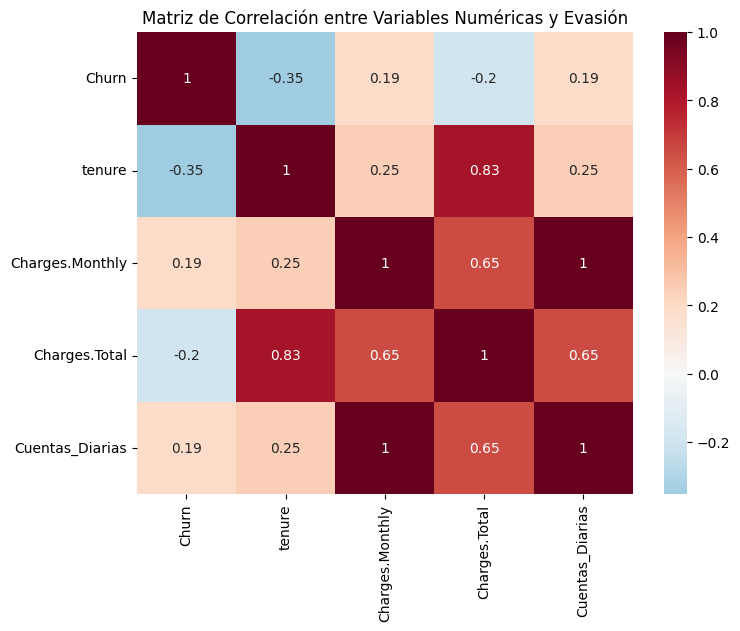

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertimos 'Churn' a numérico: Yes = 1, No = 0
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

# Selección de variables numéricas para correlación
numeric_vars = ['Churn', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

# Matriz de correlación
corr_matrix = df_corr[numeric_vars].corr()

# Visualización con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0)
plt.title('Matriz de Correlación entre Variables Numéricas y Evasión')
plt.show()

In [216]:
#Relación entre Cuentas Diarias y Evasión (Scatter Plot)
fig = px.scatter(df_corr,
                 x='Cuentas_Diarias',
                 y='Churn',
                 color='Churn',
                 color_continuous_scale=['green', 'red'],
                 labels={'Cuentas_Diarias': 'Gasto Diario Estimado', 'Churn': 'Evasión'},
                 title='Relación entre Gasto Diario y Evasión')
fig.update_traces(marker=dict(size=5), selector=dict(mode='markers'))
fig.show()


In [217]:
#Número de servicios contratados vs Evasión
# Columnas que representan servicios
servicios = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
             'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Convertimos respuestas tipo "Yes" a 1, "No"/"No internet service"/"No phone service" a 0
df_servicios = df.copy()
for col in servicios:
    df_servicios[col] = df_servicios[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Creamos columna nueva: total de servicios contratados
df_servicios['Cantidad_Servicios'] = df_servicios[servicios].sum(axis=1)

# Agregamos columna Churn numérica
df_servicios['Churn'] = df_servicios['Churn'].map({'Yes': 1, 'No': 0})

fig = px.scatter(df_servicios,
                 x='Cantidad_Servicios',
                 y='Churn',
                 color='Churn',
                 labels={'Cantidad_Servicios': 'Número de Servicios Contratados', 'Churn': 'Evasión'},
                 title='Relación entre Cantidad de Servicios y Evasión')
fig.update_traces(marker=dict(size=6), selector=dict(mode='markers'))
fig.show()

#📄Informe final

##**Introducción**

En el contexto actual de alta competencia en el sector de telecomunicaciones, retener a los clientes existentes es tan importante como adquirir nuevos. La empresa Telecom X enfrenta un problema creciente de evasión de clientes (churn), lo que impacta directamente en sus ingresos y sostenibilidad a largo plazo.

El objetivo principal de este análisis es explorar y comprender los factores que influyen en la cancelación del servicio por parte de los clientes. A través del análisis de una base de datos que contiene información demográfica, contractual y de consumo de los clientes, se busca:

*   Identificar patrones de comportamiento relacionados con la evasión.
*   Detectar segmentos de clientes con mayor riesgo de churn.
*  Proporcionar insights estratégicos que sirvan de base para el diseño de acciones de fidelización.

Este estudio representa la primera etapa del proyecto "Churn de Clientes", sirviendo como base para el desarrollo posterior de modelos predictivos de churn y políticas de retención más efectivas.

##**Limpieza y Tratamiento de Datos**

Para garantizar un análisis confiable y significativo, fue necesario realizar un proceso de preparación de datos que incluyó las siguientes etapas:

🔸 1. Importación de los Datos
Se cargó la base de datos original en un DataFrame de pandas, obteniendo información de clientes que han utilizado los servicios de Telecom X. La base incluye variables demográficas, características contractuales, servicios contratados y valores de facturación.

🔸 2. Exploración Inicial
Se realizó una primera inspección del DataFrame para entender:

Estructura de las columnas.

Tipos de datos.

Presencia de valores nulos o inconsistentes.

🔸 3. Verificación de Valores Nulos
Se identificó que no había valores nulos en ninguna columna, por lo tanto, no fue necesario aplicar imputaciones ni eliminar registros.

🔸 4. Conversión de Tipos de Datos
Se revisaron las columnas numéricas, asegurando que variables como Charges.Total y tenure tuvieran un formato adecuado para el análisis. En caso de que alguna columna numérica estuviera como texto, se convertiría utilizando pd.to_numeric() (aunque en este caso no fue necesario).

🔸 5. Creación de Nuevas Variables
Para enriquecer el análisis, se creó la columna Cuentas_Diarias, que representa el valor diario estimado que paga el cliente, calculado como:

python
Copiar
Editar
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30
Esta variable ofrece una perspectiva más granular del comportamiento de facturación de los clientes.

##**Análisis Exploratorio de Datos**

📊 Descripción de los Datos
La base de datos utilizada en este análisis contiene información de 7,043 clientes de Telecom X. Cada fila representa un cliente y cada columna describe características demográficas, contractuales, de uso de servicios y de facturación. A continuación, se presenta un resumen de las principales variables:

🔹 Variables Demográficas
gender: Género del cliente (masculino o femenino).

SeniorCitizen: Indica si el cliente es mayor de 65 años (1) o no (0).

Partner: Si el cliente tiene pareja.

Dependents: Si el cliente tiene personas a su cargo.

🔹 Variables Contractuales y de Servicio
tenure: Tiempo de permanencia del cliente (en meses).

Contract: Tipo de contrato (mensual, 1 año, 2 años).

PaperlessBilling: Si recibe facturas en línea.

PaymentMethod: Método de pago utilizado.

PhoneService, MultipleLines: Tipo de servicio telefónico.

InternetService: Tipo de servicio de internet.

OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies: Servicios adicionales contratados.

🔹 Variables de Facturación
Charges.Monthly: Valor total mensual por los servicios contratados.

Charges.Total: Total acumulado pagado por el cliente.

Cuentas_Diarias: Nueva variable creada para estimar el gasto diario, calculado como Charges.Monthly / 30.

🔹 Variable Objetivo
Churn: Variable binaria que indica si el cliente canceló (Yes) o no canceló (No) el servicio.

Esta variedad de variables permite un análisis integral de los perfiles y comportamientos de los clientes, así como de los posibles factores asociados a la evasión.



Análisis Exploratorio de Datos (EDA)
El objetivo del EDA fue comprender mejor el comportamiento de los clientes y detectar patrones relacionados con la evasión (Churn). A continuación, se presentan los principales hallazgos organizados por tipo de variable:







📌 1. Distribución de Churn (Evasión)
Se visualizó la proporción de clientes que cancelaron (Yes) frente a los que permanecen (No), utilizando un gráfico de barras interactivo.


📉 Resultado:

Aproximadamente 26% de los clientes se dieron de baja, mientras que el 74% permanecen.

Este valor confirma una alta tasa de evasión, lo que justifica la necesidad del análisis.
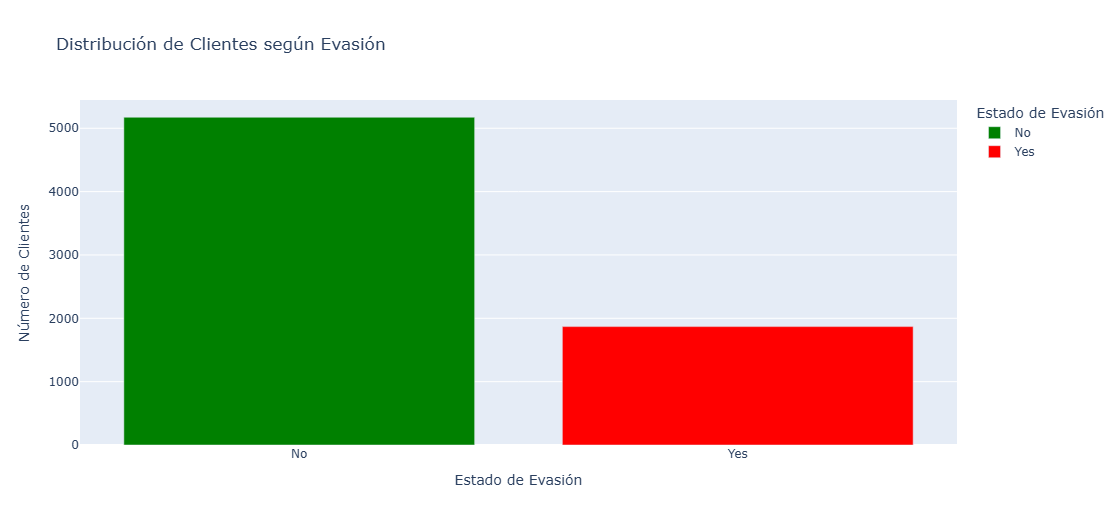

📌 2. Churn vs. Variables Categóricas
Se analizaron variables como gender, Contract, PaymentMethod, InternetService, entre otras, comparando sus distribuciones en función del estado de Churn.

📌 Hallazgos clave:

🔸 Contract: Los clientes con contrato mensual presentan una mayor tasa de cancelación. Los contratos a largo plazo (1 o 2 años) muestran mayor retención.

🔸 PaymentMethod: Quienes utilizan "Electronic check" son más propensos a cancelar.

🔸 InternetService: Los usuarios de Fiber optic tienen una tasa de churn más alta comparado con quienes usan DSL o no tienen internet.

🔸 OnlineSecurity y TechSupport: Clientes que no contratan servicios adicionales como seguridad o soporte técnico tienden a cancelar con mayor frecuencia.


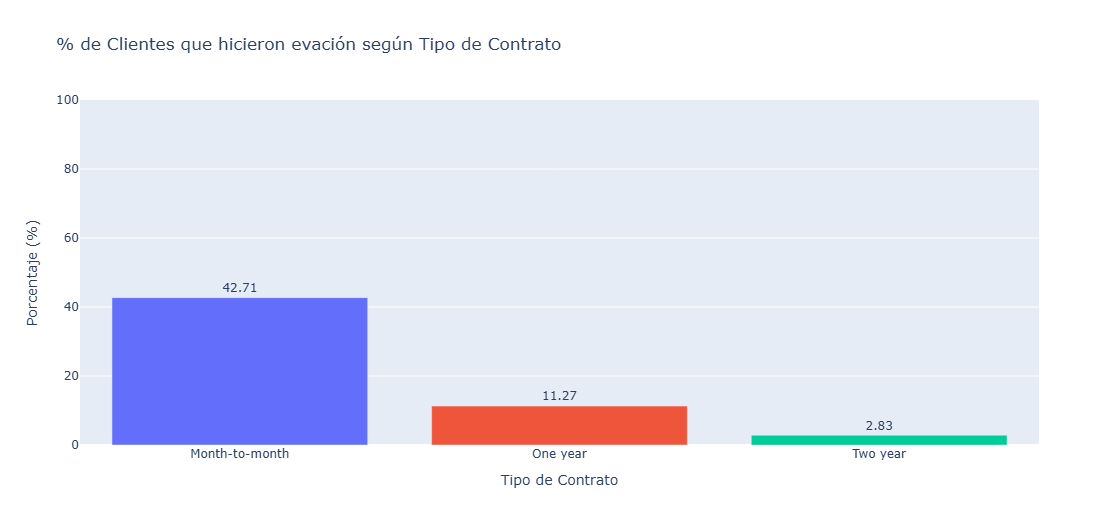



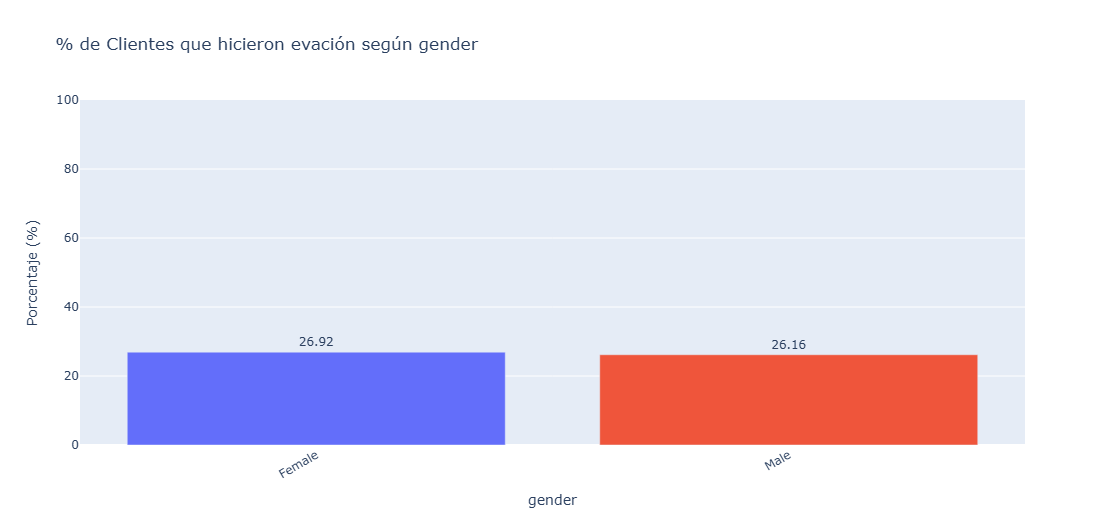

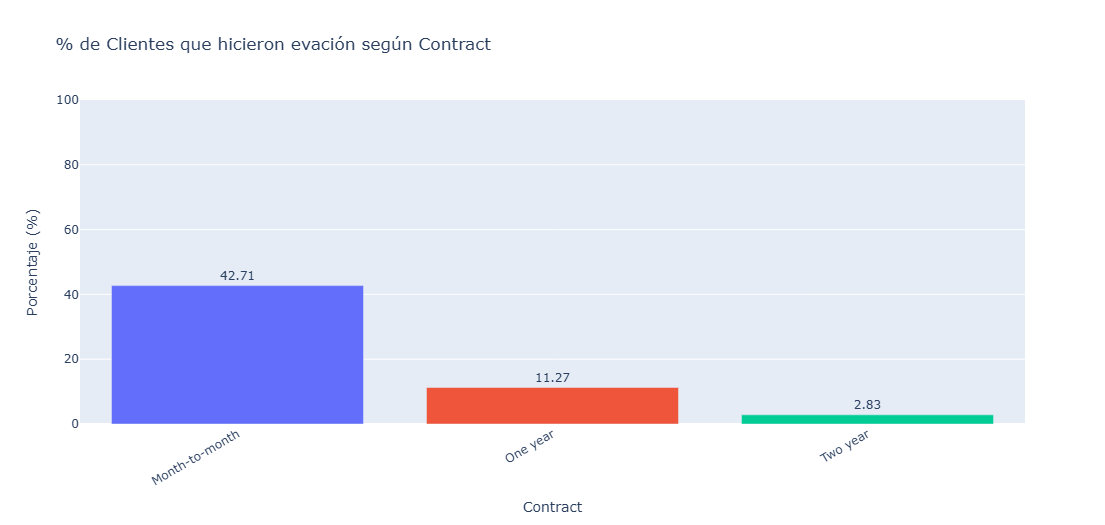

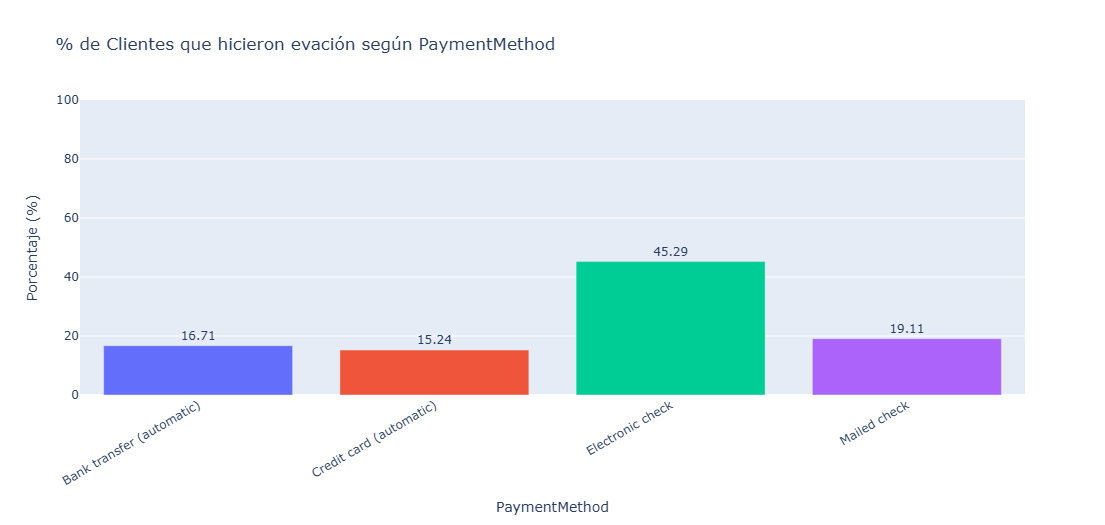

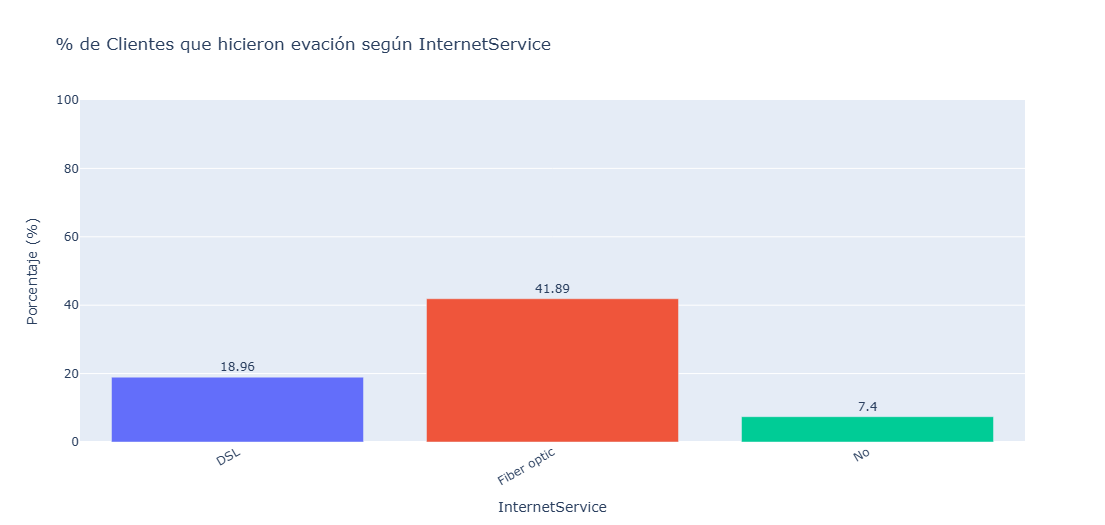

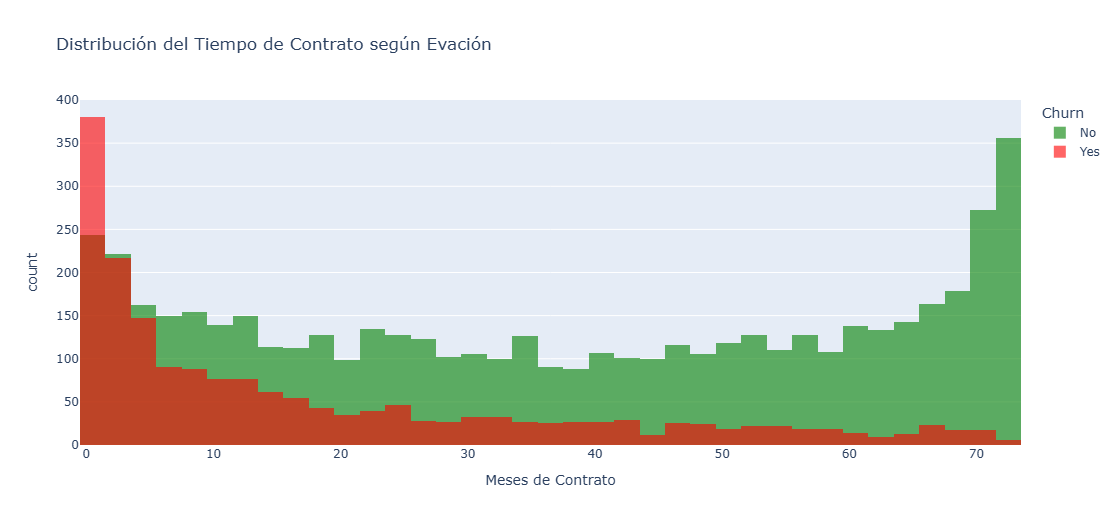

📌 3. Churn vs. Variables Numéricas
Se exploraron variables continuas como tenure, Charges.Total y la nueva columna Cuentas_Diarias.

📌 Hallazgos clave:

🔸 Tenure (meses de contrato): Los clientes con menor antigüedad tienden a cancelar más. Esto sugiere que la evasión ocurre con mayor frecuencia durante los primeros meses del servicio.

🔸 Charges.Total: Clientes que cancelan han gastado menos en total, lo cual está directamente relacionado con una menor duración del servicio.

🔸 Cuentas_Diarias: Aunque la diferencia es menos marcada, los clientes que cancelan tienen en promedio un menor gasto diario, lo que puede indicar una percepción de menor valor recibido.



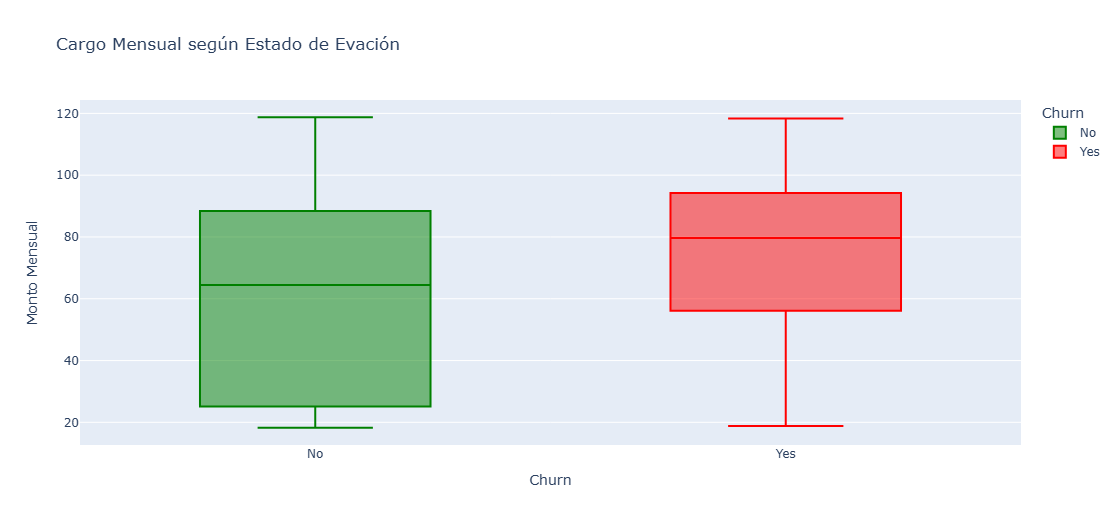

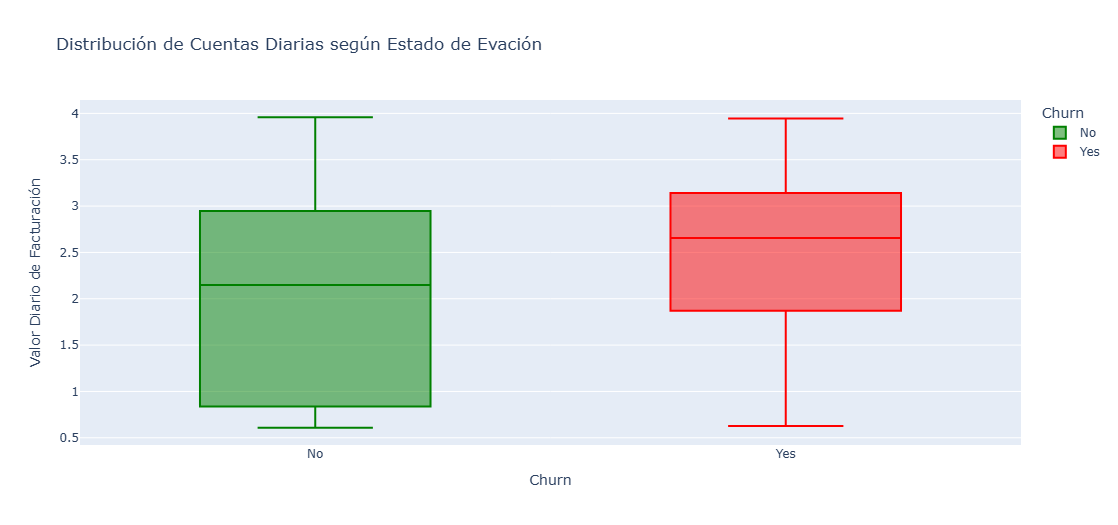

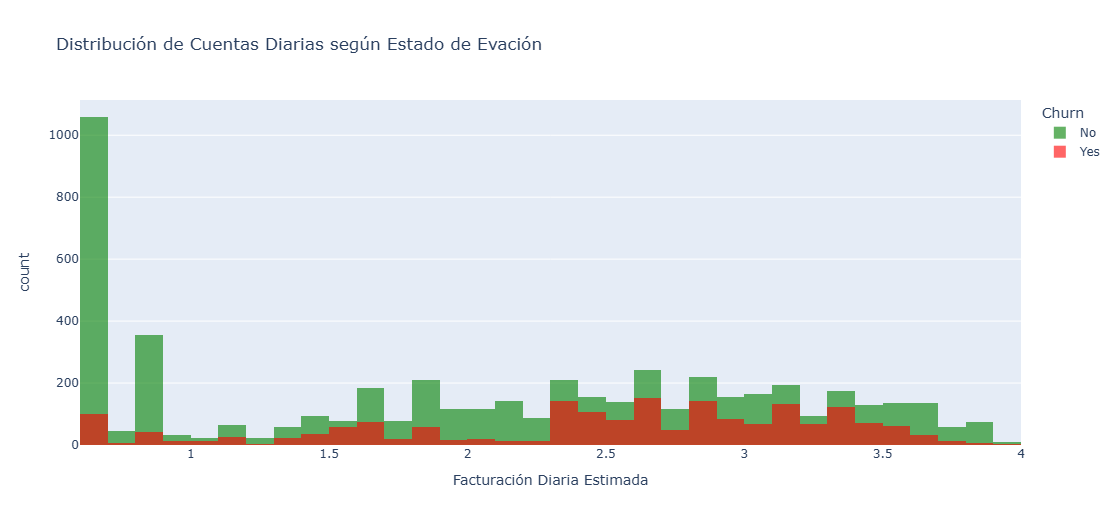

##**Conclusiones**

A partir del análisis exploratorio de los datos de clientes de Telecom X, se destacan los siguientes puntos clave que aportan a la comprensión del fenómeno de evasión (churn) y permiten diseñar estrategias efectivas para su reducción:

🔹 Alta tasa de evasión concentrada en ciertos segmentos
Aproximadamente un 26% de los clientes cancela sus servicios, un indicador significativo que requiere atención urgente.

La evasión es más común entre clientes con contratos mensuales, mientras que los contratos a largo plazo muestran mayor retención.

🔹 Factores de riesgo asociados a la evasión
Clientes que utilizan métodos de pago como "Electronic check" presentan mayor tendencia a cancelar.

Los usuarios de servicios de internet tipo "Fiber optic" muestran una mayor tasa de churn en comparación con otros tipos de internet.

La falta de contratación de servicios adicionales como Online Security y Tech Support se asocia con mayor abandono.

🔹 Comportamiento financiero y temporal
La antigüedad en la empresa (tenure) es un factor crucial: clientes con menor tiempo de contrato tienen mayor probabilidad de cancelar.

El gasto total acumulado y el gasto diario estimado (Cuentas_Diarias) son menores en clientes que cancelan, indicando que la percepción del valor puede influir en la decisión de permanecer.



##**Recomendaciones**



*   Diseñar planes de fidelización específicos para clientes con contratos mensuales, ofreciendo incentivos para que pasen a contratos de mayor duración.
*   
Implementar campañas de retención dirigidas a usuarios con métodos de pago de mayor riesgo, quizás ofreciendo opciones de pago más convenientes o seguras.
*   Promover la contratación de servicios adicionales de seguridad y soporte técnico, que parecen mejorar la percepción de valor y satisfacción.
*   Focalizar esfuerzos de atención y monitoreo en clientes nuevos o con menor antigüedad, con estrategias de bienvenida y acompañamiento personalizado.
*   Estos hallazgos constituyen una base sólida para el desarrollo posterior de modelos predictivos que permitan identificar clientes en riesgo de evasión y activar acciones preventivas que mejoren la retención y los ingresos de Telecom X.












